In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error, 
    precision_score,
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix
)
from sklearn.datasets import make_classification

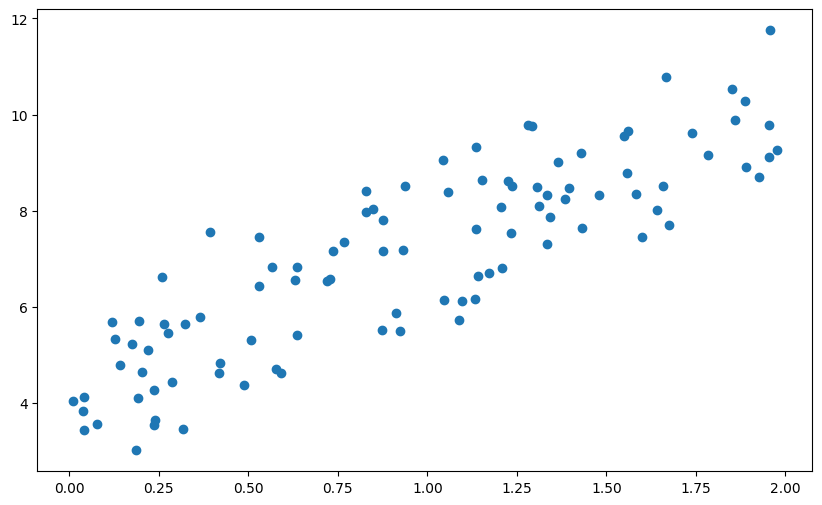

In [27]:
np.random.seed(0)
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg + np.random.randn(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg)

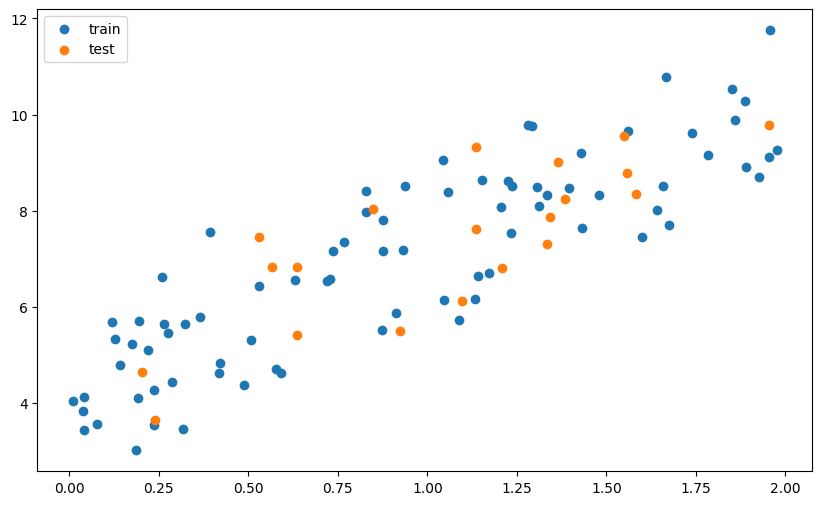

In [28]:
plt.figure(figsize=(10, 6))
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
plt.scatter(X_train_reg, y_train_reg)
plt.scatter(X_test_reg, y_test_reg)
plt.legend(['train', 'test'])
plt.show()

In [86]:
lin_reg = ElasticNet(alpha=10.)
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

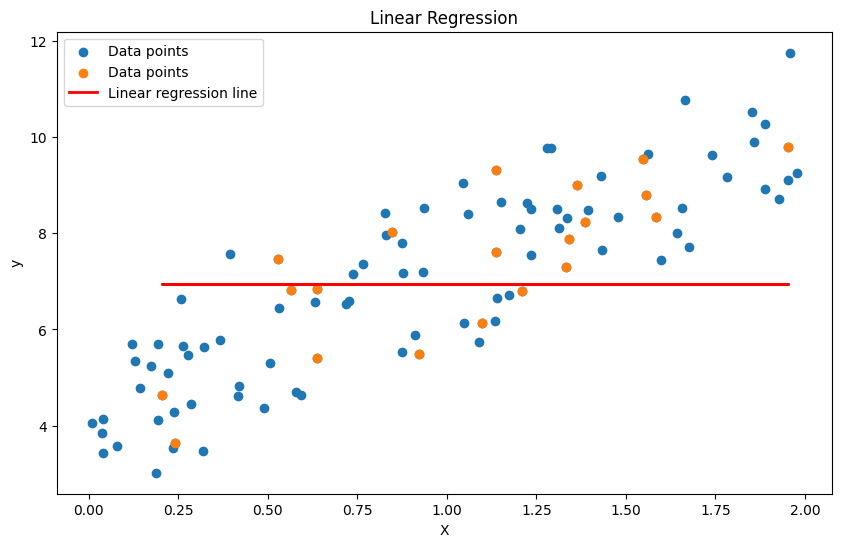

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, label='Data points')
plt.scatter(X_test_reg, y_test_reg, label='Data points')

plt.plot(X_test_reg, y_pred_reg, color='red', linewidth=2, label='Linear regression line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

pred = kx + b

loss_mse = (y - (kx + b))^2
loss_l1 = sum(|w|)
loss_l2 = sum(w^2)


loss = loss_mse + alpha * loss_l1

In [88]:
4.2 3
4.9 2

SyntaxError: invalid syntax (1636904882.py, line 1)

In [89]:
(4.2+3)/2
(4.9+2)/ 2

3.45

In [90]:
# dir(lin_reg)

In [91]:
lin_reg.intercept_

array([6.94733759])

In [92]:
lin_reg.coef_

array([0.])

In [93]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
smape = 100.0 * np.mean(np.abs(y_pred_reg - y_test_reg) / (np.abs(y_test_reg) + np.abs(y_pred_reg)))

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SMAPE: {smape:.2f}%")

MAE: 1.39
MSE: 2.81
SMAPE: 9.90%


# Классификация

In [94]:
X_class, y_class = make_classification(
    n_samples=200,
    n_features=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=42,
    class_sep=0.5
)

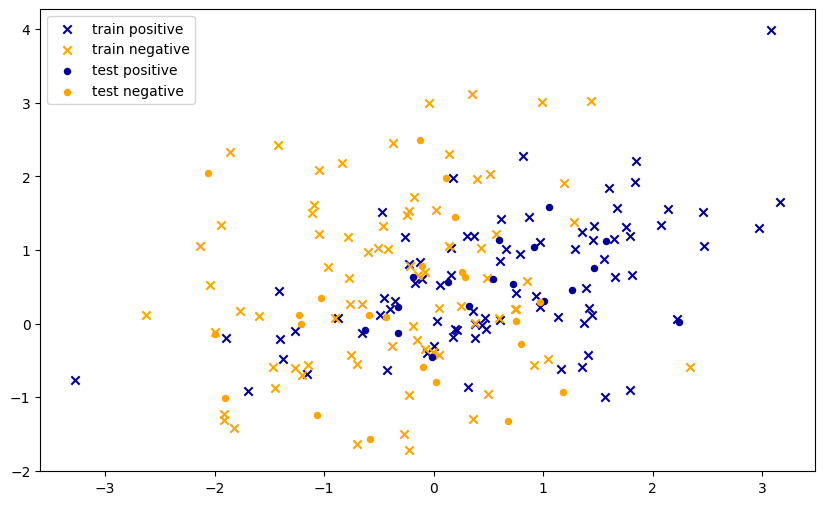

In [95]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, 
    y_class, 
    test_size=0.2, 
    random_state=42
)

plt.figure(figsize=(10, 6))

is_positive = y_train_class == 1
plt.scatter(X_train_class[is_positive][:, 0], X_train_class[is_positive][:, 1], c='#000099', marker='x', label='train positive')
plt.scatter(X_train_class[~is_positive][:, 0], X_train_class[~is_positive][:, 1], c='orange', marker='x', label='train negative')

is_positive = y_test_class == 1
plt.scatter(X_test_class[is_positive][:, 0], X_test_class[is_positive][:, 1], c='#000099', marker='o', s=19, label='test positive')
plt.scatter(X_test_class[~is_positive][:, 0], X_test_class[~is_positive][:, 1], c='orange', marker='o', s=19, label='test negative')


plt.legend()
plt.show()

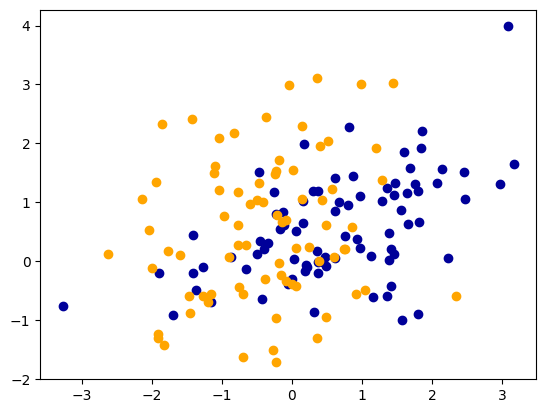

In [96]:
is_positive = y_train_class == 1
plt.scatter(X_train_class[is_positive][:, 0], X_train_class[is_positive][:, 1], c='#000099', label='train positive')
plt.scatter(X_train_class[~is_positive][:, 0], X_train_class[~is_positive][:, 1], c='orange', label='train negative')


In [114]:
from sklearn.tree import DecisionTreeClassifier

log_reg = DecisionTreeClassifier(max_depth=9)
log_reg.fit(X_train_class, y_train_class)
y_pred_class = log_reg.predict(X_test_class)

In [115]:
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
roc_auc = roc_auc_score(y_test_class, y_pred_class)

# confusion_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# print('confustion matrix:')
# print(confusion_matrix)

Precision: 0.55
Recall: 0.71
F1 Score: 0.62
ROC AUC: 0.64


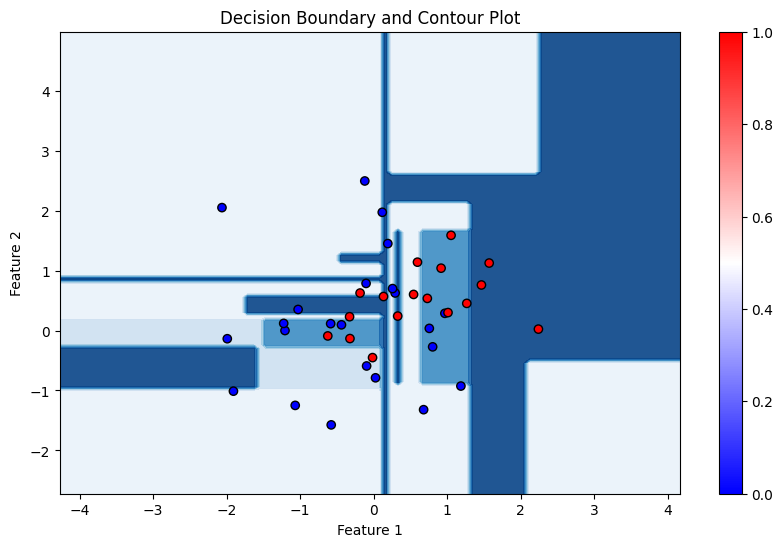

In [117]:
x0, x1 = np.meshgrid(
    np.linspace(X_class[:, 0].min() - 1, X_class[:, 0].max() + 1, 100),
    np.linspace(X_class[:, 1].min() - 1, X_class[:, 1].max() + 1, 100)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)[:, 1].reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_proba, alpha=0.9, cmap='Blues')
# plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='bwr', edgecolor='k')

plt.scatter(X_test_class[:, 0], X_test_class[:, 1], c=y_test_class, cmap='bwr', edgecolor='k')

plt.colorbar()

# plt.contour(x0, x1, y_proba, levels=[0.5], linewidths=2, colors='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Contour Plot')
plt.show()

In [48]:
# log_reg.feature_importances_

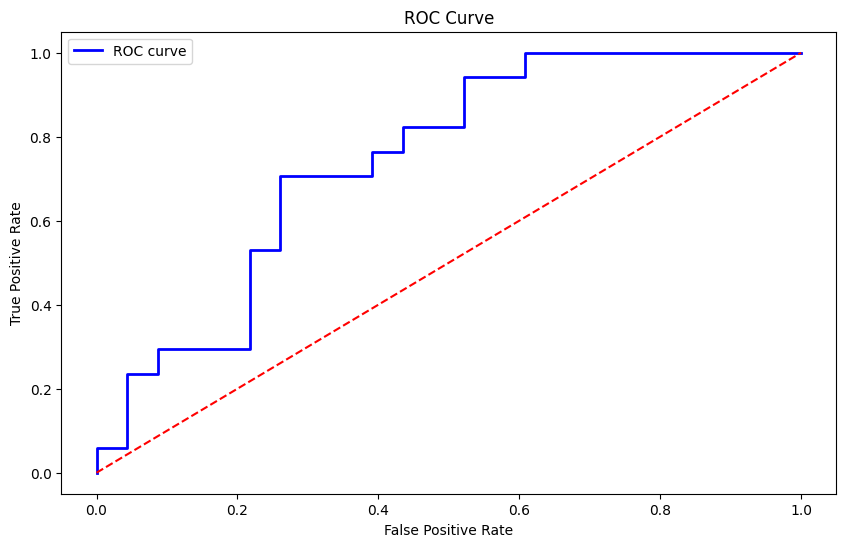

In [49]:
fpr, tpr, _ = roc_curve(y_test_class, log_reg.predict_proba(X_test_class)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()